In [8]:
from quick_era5 import era5_downloader, era5_converter
import datetime
import matplotlib.pyplot as plt

In [14]:
# 下載ERA5資料
# Download ERA5 data
variable_list = ['2m_temperature', 'geopotential']
from_datetime = datetime.datetime(2020, 1, 1, tzinfo=datetime.timezone.utc)  # 包含此時間（include）
to_datetime = datetime.datetime(2020, 1, 2, tzinfo=datetime.timezone.utc)  # 包含此時間（include）
time_interval = 1  # 以小時為單位（in hours）
xarr = era5_downloader.download_era5_data_from_gcs(variable_list=variable_list, from_datetime=from_datetime, to_datetime=to_datetime, time_interval=time_interval)

xarr

<xarray.Dataset> Size: 4GB
Dimensions:         (time: 25, latitude: 721, longitude: 1440, level: 37)
Coordinates:
  * latitude        (latitude) float32 3kB 90.0 89.75 89.5 ... -89.75 -90.0
  * level           (level) int64 296B 1 2 3 5 7 10 ... 875 900 925 950 975 1000
  * longitude       (longitude) float32 6kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * time            (time) datetime64[ns] 200B 2020-01-01 ... 2020-01-02
Data variables:
    2m_temperature  (time, latitude, longitude) float32 104MB ...
    geopotential    (time, level, latitude, longitude) float32 4GB ...
Attributes:
    valid_time_start:  1940-01-01
    last_updated:      2024-10-17 20:04:10.783634
    valid_time_stop:   2024-07-31

In [5]:
# 將xarray資料轉換成netcdf檔案
# Convert xarray data to netcdf file
era5_converter.era5_xarray_to_netcdf(xarr, 'output.nc')

In [7]:
# 將xarray資料轉換成numpy array
# Convert xarray data to numpy array
variable = '2m_temperature'
time = datetime.datetime(2020, 1, 1, 12, tzinfo=datetime.timezone.utc)
z = None
array = era5_converter.era5_xarray_to_nparray(xarr, variable, z, time)

array

array([[245.96442, 245.96442, 245.96442, ..., 245.96442, 245.96442,
        245.96442],
       [246.71997, 246.72151, 246.7246 , ..., 246.71074, 246.71382,
        246.71689],
       [246.88   , 246.88617, 246.89232, ..., 246.86308, 246.86923,
        246.87386],
       ...,
       [245.57355, 245.57509, 245.57971, ..., 245.56586, 245.5674 ,
        245.572  ],
       [246.25679, 246.25986, 246.25986, ..., 246.25371, 246.25525,
        246.25525],
       [246.74306, 246.74306, 246.74306, ..., 246.74306, 246.74306,
        246.74306]], dtype=float32)

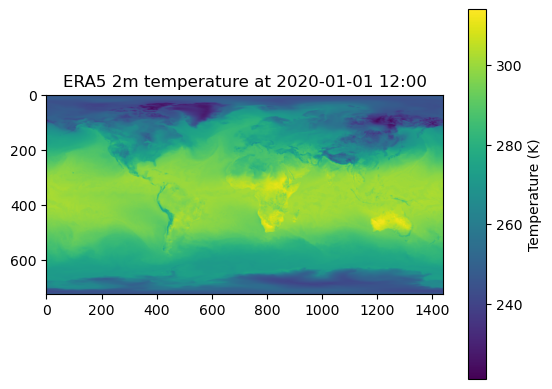

In [13]:
# 將numpy array繪製成圖
# Plot numpy array
plt.imshow(array)
plt.title("ERA5 2m temperature at 2020-01-01 12:00")
plt.colorbar().set_label('Temperature (K)')
plt.show()